In [9]:
import os

# Define datasets, experiment names, and expected filenames
datasets = ["mobiact_realworld"]
experiment_names = ["Df", "Syn", "Df_Syn", "FS_Dpfs", "FS_Df_Dpfs", "FS_Syn", "FS_Df_Syn", "FS_Syn_Dpfs", "FS_Df_Syn_Dpfs", "FS_Df_plus_Dpfs", "FS_Df_plus_Syn", "Dp"]
experiment_names = ["Df", "Df_aug", "Df_rot", "Syn", "Syn_aug", "Df_Syn", "Df_plus_Syn", "Dp"]
required_files = [f"{dataset}_{experiment}.csv" for dataset in datasets for experiment in experiment_names]

# Directory containing the result files
results_dir = "results"

# Check for missing files
missing_files = [file for file in required_files if not os.path.isfile(os.path.join(results_dir, file))]

# Print results
if missing_files:
    print("The following files are missing:")
    for file in missing_files:
        print(file)
else:
    print("All required files are present.")


The following files are missing:
mobiact_realworld_Df_rot.csv


In [10]:
import os
import pandas as pd

def create_summary_csv(dataset, results_dir="results"):
    
    # Dictionary to store data for each source across experiments and modes
    data_acc = {}
    data_loss = {}
    data_f1 = {}
    
    for experiment in experiment_names:
        file_path = os.path.join(results_dir, f"{dataset}_{experiment}.csv")
        if os.path.isfile(file_path):
            # Read the file and extract source, mode, and accuracy columns
            df = pd.read_csv(file_path)
            # Group by 'source', then compute the average accuracy for each combination
            avg_accuracy = df.groupby(['source'])['accuracy'].mean()
            avg_loss = df.groupby(['source'])['loss'].mean()
            avg_f1 = df.groupby(['source'])['f1'].mean()
            # Store results in dictionary
            data_acc[experiment] = round(avg_accuracy, 4)
            data_loss[experiment] = round(avg_loss, 4)
            data_f1[experiment] = round(avg_f1, 4)
        else:
            print(f"Warning: {file_path} does not exist and will be skipped.")
    
    # Combine all data into a single DataFrame
    summary_acc = pd.concat(data_acc.values(), axis=1, keys=data_acc.keys())
    summary_loss = pd.concat(data_loss.values(), axis=1, keys=data_loss.keys())
    summary_f1 = pd.concat(data_f1.values(), axis=1, keys=data_f1.keys())
    
    # # Save the result to a new CSV file
    # output_file = os.path.join(results_dir, f"{dataset}_results.csv")
    # summary_df.to_csv(output_file)
    # print(f"Summary CSV file saved as: {output_file}")

    print(summary_acc)
    print()
    print(summary_loss)
    print()
    print(summary_f1)

# Usage example
create_summary_csv("mobiact_realworld", results_dir)


            Df  Df_aug     Syn  Syn_aug  Df_Syn  Df_plus_Syn     Dp
source                                                             
WAL     0.7651  0.8183  0.8245    0.453  0.7938       0.7618  0.989

            Df  Df_aug     Syn  Syn_aug  Df_Syn  Df_plus_Syn      Dp
source                                                              
WAL     0.8568  0.6462  0.7467   5.7452  0.8564       0.9333  0.0301

            Df  Df_aug     Syn  Syn_aug  Df_Syn  Df_plus_Syn     Dp
source                                                             
WAL     0.7376  0.8048  0.8129   0.3184  0.7823       0.7363  0.989


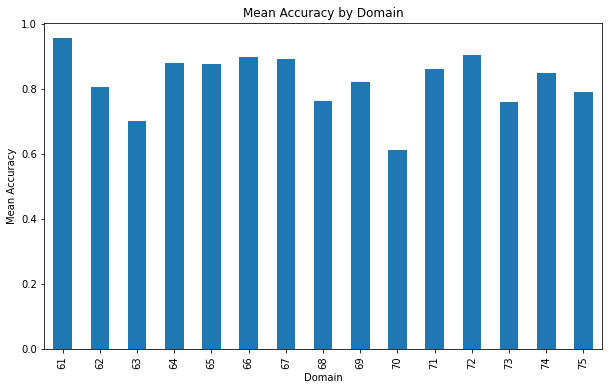

Worst n domains with their accuracies:
domain
70    0.610902
63    0.700000
73    0.760832
68    0.761755
75    0.791738
62    0.806452
69    0.821678
74    0.849530
71    0.861111
65    0.877133
Name: accuracy, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'results/mobiact_realworld_Syn.csv'
data = pd.read_csv(file_path)

# Group by 'domain' and calculate mean accuracy
domain_accuracies = data.groupby('domain')['accuracy'].mean()

# Plot the accuracies
plt.figure(figsize=(10, 6))
domain_accuracies.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Domain')
plt.show()

# Get the worst n domains with their accuracies
worst_n_domains = domain_accuracies.nsmallest(10)
print("Worst n domains with their accuracies:")
print(worst_n_domains)

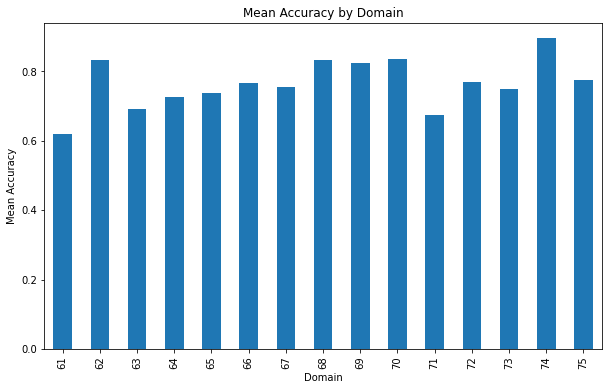

Worst n domains with their accuracies:
domain
61    0.618138
71    0.673039
63    0.691639
64    0.725292
65    0.737201
73    0.748527
67    0.754155
66    0.766607
72    0.768503
75    0.776076
Name: accuracy, dtype: float64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'results/mobiact_realworld_Df.csv'
data = pd.read_csv(file_path)

# Group by 'domain' and calculate mean accuracy
domain_accuracies = data.groupby('domain')['accuracy'].mean()

# Plot the accuracies
plt.figure(figsize=(10, 6))
domain_accuracies.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Domain')
plt.show()

# Get the worst n domains with their accuracies
worst_n_domains = domain_accuracies.nsmallest(10)
print("Worst n domains with their accuracies:")
print(worst_n_domains)

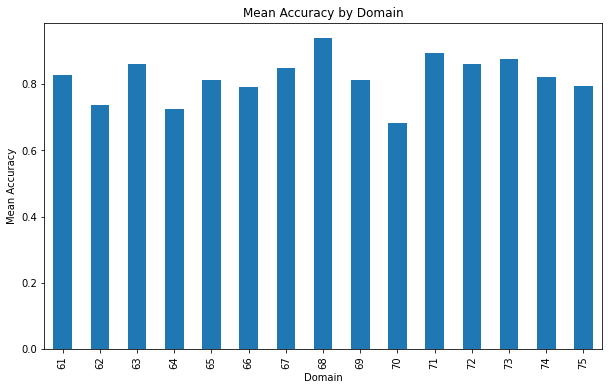

Worst n domains with their accuracies:
domain
70    0.682707
64    0.725292
62    0.735663
66    0.789698
75    0.794492
65    0.810922
69    0.811888
74    0.821317
61    0.827448
67    0.848997
Name: accuracy, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'results/mobiact_realworld_Df_aug.csv'
data = pd.read_csv(file_path)

# Group by 'domain' and calculate mean accuracy
domain_accuracies = data.groupby('domain')['accuracy'].mean()

# Plot the accuracies
plt.figure(figsize=(10, 6))
domain_accuracies.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Domain')
plt.show()

# Get the worst n domains with their accuracies
worst_n_domains = domain_accuracies.nsmallest(10)
print("Worst n domains with their accuracies:")
print(worst_n_domains)